In [1]:
!pip install mglearn

# 지도학습 - 선형회귀 (Linear Regression)

회귀 모델이란?

- 어떤 자료에 대해서 그 값에 영향을 주는 조건을 고려하여 구한 평균 <br>
(어떤 데이터들이 굉장히 크거나 작을지라도 전체적으로 이 데이터들은 전체 평균으로 회귀하려는 특징이 있다는 통계학 기법)


- \\( y = h(x_1, x_2, x_3, ..., x_k; W_1, W_2, W_3, ..., W_k) + \epsilon \\)

 - h() : 조건에 따른 평균을 구하는 함수 (회귀 모델)
 - x : 어떤 조건(특성)
 - W : 각 조건의 영향력(가중치)
 - e : ‘오차항’을 의미. 다양한 현실적인 한계로 인해 발생하는 불확실성으로 일종의 잡음(noise)

선형 모델이란?

- 입력 특성에 대한 선형 함수를 만들어 예측을 수행

- 다양한 선형 모델이 존재

- 분류와 회귀에 모두 사용 가능


<center>

시험성적 데이터

|X ( 학습 시간 )| Y ( 시험 점수 )|
|-|-|
|9 |90|
|8 |80|
|4| 40|
|2| 20|

7시간 공부 할 경우 성적은?
</center>



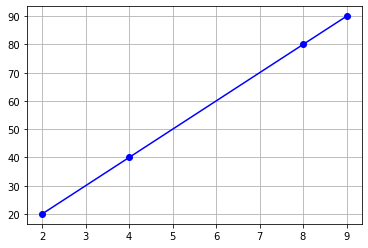

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

x = [9, 8, 4, 2]
y = [90, 80, 40, 20]

plt.plot(x, y, 'b-o')
plt.grid()

 $y=ax+b$

 - a : 기울기
 - b : 절편, 이동한 간격 (bias가 된다.)

<center>

시험성적 데이터

|X ( 학습 시간 )| Y ( 시험 점수 )|
|---|---|
|8 |97|
|6 |91|
|4| 93|
|2| 81|

7시간 공부 할 경우 성적은?
</center>



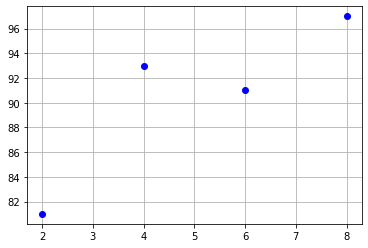

In [3]:
x = [8, 6, 4, 2]
y = [97, 91, 93, 81]

plt.plot(x, y, 'bo')
plt.grid()

# 선형이 아니므로 추세만 보기 위해 점을 이은 선을 지운다.

 $y=ax+b$

 - a : 기울기
 - b : 절편

### 최소제곱법

> $$a=\frac { (x-x평균)(y-y평균)의 합 }{ { (x-x평균) }^{ 2 }의 합 }$$

- 공부한 시간(x)의 평균: (2+4+6+8) / 4 = 5
- 성적(y)의 평균: (81+93+91+97) / 4 = 90.5

> $$b=y의 평균- (x의 평균 \times 기울기 a)$$

- b = 90.5 - (2.3 x 5) = 79


In [4]:
a = ( (2-5)*(81-90.5)+(4-5)*(93-90.5)+(6-5)*(91-90.5)+(8-5)*(97-90.5) )  /  ( (2-5)**2 + (4-5)**2 + (6-5)**2 + (8-5)**2 )
a1 = ( (2-5)*(81-90.5)+(4-5)*(93-90.5)+(6-5)*(91-90.5)+(8-5)*(97-90.5) ) 
a2 = ( (2-5)**2 + (4-5)**2 + (6-5)**2 + (8-5)**2 )
a1, a2, a

(46.0, 20, 2.3)

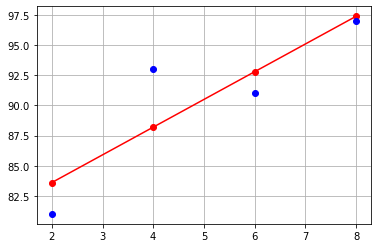

In [5]:
# 오차가 최저가 되는 직선
import numpy as np
# 기울기 a를 최소제곱법으로 구하는 함수
def compute_a(x, y, mean_x, mean_y):
  # 분자부분
  dc = 0
  for i in range(len(x)):
    dc += (x[i] - mean_x) * (y[i] - mean_y)

  # 분모부분
  divisor = 0
  for i in range(len(x)):
    divisor += (x[i] - mean_x)**2
  
  a = dc / divisor
  return a

x = [8, 6, 4, 2]
y = [97, 91, 93, 81]
mx = np.mean(x)
my = np.mean(y)
a = compute_a(x, y, mx, my)  # 기울기
b = my - (mx * a)            # 절편

y_pred = [ a * x1 + b for x1 in x ]

plt.plot(x, y_pred, 'r-o')
plt.plot(x, y, 'bo')
plt.grid()
plt.show()

## 선형회귀(Linear Regression) <br>
 또는 최소제곱법(Ordinary Least Squares)

- 종속변수(응답변수) y와 한 개 이상의 독립변수(입력변수) x와의 상관관계를 모델링한 것

 >  $y=Wx+b$
  - (W : 가중치, b : 편향(bias))

 > $H(x)=Wx+b$
  - H(x) : Linear 하게 Hypothesis(가설)을 세운다는 것
  - 데이터를 가장 잘 대변할 수 있는 H(x)의 W와 b를 정하는 것이 Linear Regression의 목적

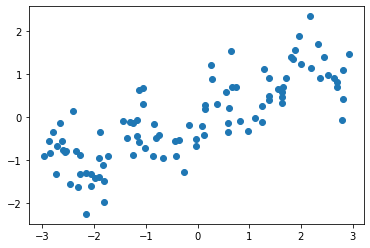

In [6]:
import numpy as np
import mglearn

X, y = mglearn.datasets.make_wave(100)
plt.scatter(X, y)
plt.show()

w[0]: 0.393906  b: -0.031804


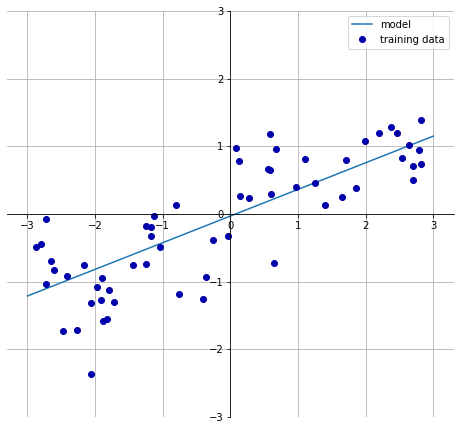

In [7]:
import mglearn
mglearn.plots.plot_linear_regression_wave()

- 비용함수 (Cost / Cost function) : 그려진 직선 Hypothesis(H(x))와 실제 데이터(y)의 차이

  - Cost = H(x) - y에 데이터를 대입하여 Cost의 총합을 구하는 것이 가능
  - Cost의 총합이 작은 Hypothesis일수록 데이터를 잘 대변하는 훌륭한 Linear Regression
  - Cost는 양수일 수도, 음수일 수도 있기에 이러한 문제를 방지하고자 총합을 구할 때 Cost값을 제곱하여 평균을 내는 방식(평균제곱오차, MSE, Mean Squared Error)을 사용
  >  $( cost(W,b)=\cfrac { 1 }{ m } \sum _{ i=1 }^{ m } { (H({ x }^{ (i) })-{ y }^{ (i) }) }^{ 2 }  $

   > $H(x)=Wx+b$

 - 머신러닝(or 딥러닝)에서 learning의 목적은 Cost를 정의하고 이를 최소화하는 것

#### 평균제곱오차 (MSE, Mean Squared Error) - <u>잘못그은 선 바로잡기</u>

- 실제값과 예측값의 차이를 분석하기 위한 것
- 음수가 존재하는 경우 오차가 줄어드는 문제 -> 자승을 취함
- 평균오차가 자승으로 인해 커지는 문제 -> 제곱근을 취함 : $RootMSE = RMSE$

|x(hour) | y(score)|
|---|---|
|0|0|
|1|1|
|2|2|
|3|3|

$H(x)=1 \times  x+0$

$H(x)=0.5 \times x+0$

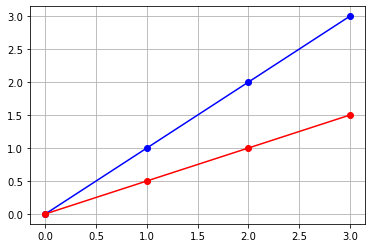

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.array([0, 1, 2, 3])
y = np.array([0, 1, 2, 3])

# 가중치(계수) 및 편향(절편)
w = 1
b = 0
y_pred1 = w * x + b
plt.plot(x, y_pred1, 'b-o')

w = 0.5
b = 0
y_pred2 = w * x + b
plt.plot(x, y_pred2, 'r-o')

plt.grid()
plt.show()

#### 평균제곱오차 (MSE, Mean Squared Error) 연습 01
가설의 MSE 값을 계산해보자.


$$( \cfrac { { (H({ x }^{ (1) })-{ y }^{ (1) }) }^{ 2 } + { (H({ x }^{ (2) })-{ y }^{ (2) }) }^{ 2 }+ { (H({ x }^{ (3) })-{ y }^{ (3) }) }^{ 2 }+ { (H({ x }^{ (4) })-{ y }^{ (4) }) }^{ 2 } }{ 4 } = ?$$

In [9]:
# y_pred(예측값), y(실제값)
def MSE(y_pred, y):
  cost = sum((y_pred - y) ** 2) / len(y)
  return cost 

MSE(y_pred1, y), MSE(y_pred2, y)

(0.0, 0.875)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.array([0, 1, 2, 3])
y = np.array([0, 1, 2, 3])

# 가중치(계수) 및 편향(절편)


#### 경사하강법 (Gradient descent algorithm) - 오차 수정하기

어떻게 비용함수 값이 최소가 되는 W 파라미터를 구할 수 있을까?

- 점진적인 하강, 점진적으로 반복적인 계산을 통해 W 파라미터 값을 업데이트 하면서 오류 값이 최소가 되는 값을 구하는 방식

- 함수의 기울기(경사)를 구하여 기울기가 낮은 쪽으로 
계속 이동하여 값을 최적화 시키는 방법 <br> (오차 (기울기)가 가장 작은 방향으로 이동시키는 방법)


learning_rate(학습 속도)란?

- W와 b의 미분 값(W_grad, b_grade)을 얼마만큼 반영할지를 결정하는 값.
- 주로 0.001, 0.00001과 같은 매우 작은 값을 사용하며 learning_rate가 클수록 변화가 빠르며, learning_rate가 작을수록 변화가 느리다고 예상.
- 꼭 변화가 빠르다고 해서 결과를 빨리 볼 수 있는 것은 아님.

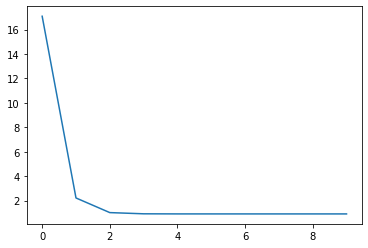

In [39]:
import numpy as np
import matplotlib.pyplot as plt
w_val = []
cost_val = []

# n개의 샘플 생성
n_sample = 200
# random하게 x를 생성
x = np.random.randn(n_sample) # np.random.randn(개수) : 평균 0 표편 1의 가우시안 표준정규분포 난수 생성
y = 2 * x + 4 + np.random.randn(n_sample) # noise 생성 : 2 * x + 4 (4ㄹ가 없으면 일직선 위의 선이 된다. noise : 4)

# $\therefore$ w = 2, b = 4 이며 이 값을 예측하는 것이 목표다.

n_epoch = 10    # 반복 횟수
learning_rate = 0.7 # 학습 속도

w = np.random.uniform() 
b = np.random.uniform() 

for epoch in range(n_epoch):
    y_pred = w * x + b  # x값을 가지고 새로운 y가 생성 될 것. w와 b는 랜덤이다. 
    cost = MSE(y_pred, y)     # 를 해도 되고 MAE를 해도 됨 (MAE 소개해달라고 요청 할 것)
    
    # x 의 차이 :  이렇게 하면 기울기를 조절할 수 있는 변화량이 생긴다. / y의 차이만큼의 x의 변화량
    xx = learning_rate * ((y_pred - y) * x).mean()    # 가중치와의 차이값을 설정 : 차이에 x를 곱하면 차이 알 수 O
    # y 의 차이
    yy = (y_pred-y).mean()

    # print(f"epoch : {epoch:.2f}\nw = {w:.6f} b = {b:.6f} \ncost = {cost:.6f}\nlr * ((y_pred - y) * x).mean() : {xx:.6f} (y_pred-y).mean() = {yy:.6f}\n")

    # 갱신
    w = w - xx 
    b = b - learning_rate * (y_pred - y).mean()    # 미분하지 않고 차이만 구한 값

    # 기울기는 0에 가까워지고 w는 2에 가까워진다.

    # plt.plot(x, y_pred)     # 선이 달라지는것 확인

    w_val.append(w) 
    cost_val.append(cost)

plt.plot(range(n_epoch), cost_val)  # 학습 속도를 줄이면 기울기가 완만해진다.

#### LinearRegression 실습 01

배달시간 예측
- 설정 거리의 장소에 배달하려면 얼마나 걸리는지 예측

In [12]:
import numpy as np 
from matplotlib import pyplot as plt 

In [50]:
# 배달거리와 배달시간 데이터
data = np.array([
    [100, 20], 
		[150, 24], 
		[300, 36], 
		[400, 47], 
		[130, 22], 
		[240, 32],
		[350, 47], 
		[200, 42], 
		[100, 21], 
		[110, 21], 
		[190, 30], 
		[120, 25], 
		[130, 18], 
		[270, 38], 
		[255, 28]])

x = data[:, 0]
y = data[:, 1]

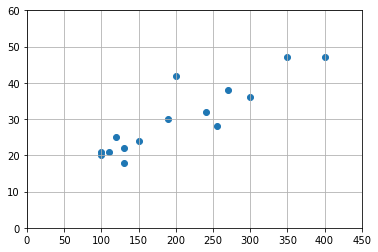

In [52]:
plt.scatter(x, y)
plt.xlim(0, 450)
plt.ylim(0, 60)
plt.grid()

AttributeError: 'numpy.ndarray' object has no attribute 'maen'

In [55]:
# 기울기 a를 최소제곱법으로 구하는 함수
def compute_a(x, y, mean_x, mean_y):
    x_array, y_array = np.array(x), np.array(y)
    # 분자 부분
    dc = np.sum((x_array - mean_x) * (y_array - mean_y))
    # 분모 부분  
    divisor = np.sum((x_array - mean_x) ** 2)
    return dc/divisor

mx = np.mean(x)
my = np.mean(y)
a = compute_a(x, y, mx, my)  # 기울기
b = my - (mx * a)            # 절편
a, b


(0.09229753862877553, 11.330266325025235)

- 예측하기 (거리가 350인경우 배달시간)

In [57]:
y_t = a * 350 + b 
y_t

43.63440484509667

#### 일반 선형회귀

예측값과 실제 값의 cost를 최소화할 수 있도록 W(가중치, 회귀계수)를 최적화하며, 규제(Regularization)를 적용하지 않은 모델

단순 선형회귀 (Simple Linear Regression)
> $ H({ x })={ W }{ x }+b $

다변수 선형회귀 (Multi-variable Linear Regreesion)
> 변수가 3개 일때의 H(x) <br>
> $ H({ x }_{ 1 },{ x }_{ 2 },{ x }_{ 3 })={ W }_{ 1 }{ x }_{ 1 }+{ W }_{ 2 }{ x }_{ 2 }+{ W }_{ 3 }{ x }_{ 3 }+b $

> 변수가 n개 일때의 H(x) <br>
>  $ H({ x }_{ 1 },{ x }_{ 2 },{ x }_{ 3 },\dots ,{ x }_{ n })={ W }_{ 1 }{ x }_{ 1 }+{ W }_{ 2 }{ x }_{ 2 }+{ W }_{ 3 }{ x }_{ 3 }+\dots +{ W }_{ n }{ x }_{ n }+b $

다항 회귀 (Polynomial Regreesion)
> 회귀가 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것 <br>
> 차수가 높아질수록 과적합의 문제가 발생


In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [16]:
from sklearn.preprocessing import PolynomialFeatures



In [17]:
from sklearn.linear_model import LinearRegression


#### LinearRegression 실습 02

wave 데이터셋에 선형회귀 적용

LinearRegression()
```
LinearRegression(fit_intercept, normalize, copy_X, n_jobs)
```
- fit_intercept : 모형에 상수항 (절편)이 있는가 없는가를 결정하는 인수 (default : True)
- normalize : 매개변수 무시 여부
- copy_X : X의 복사 여부
- n_jobs : 계산에 사용할 작업 수

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



#### LinearRegression 실습 03 - 1
변수가 1개인 경우

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


# 계수 및 절편
# 노이즈


In [20]:
# 피어슨 상관계수 값을 계산
# 그래프 기울기 방향 '\'
# 가로축, 세로축에 x, y를 두었을 때 자기 자신하고 비교하면 무조건 상관계수가 1이 나오는 특성 때문


In [21]:
from sklearn.linear_model import LinearRegression


#### LinearRegression 실습 03 - 2
변수가 2개인 경우

다변수 선형 회귀 (Multi-variable Linear Regreesion)



#### LinearRegression 실습 04

보스턴 집값 데이터셋 구성
- 506개의 데이터
- 13개의 정보와 1개의 클래스로 구성
```
0 CRIM : 인구 1인당 범죄 발생 수
1 ZN : 25,000평방 피트 이상의 주거 구역 비중
2 INDUS : 소매업 외 상업이 차지하는 면적 비율
3 CHAS : 찰스강 위치 변수 (1: 강 주변, 0: 이외)
4 NOX : 일산화질소 농도
5 RM : 집의 평균 방 수
6 AGE : 1940년 이전 지어진 비율
7 DIS : 5가지 보스턴 시 고용 시설까지의 거리
8 RAD : 순환고속도로의 접근 용이성
9 TAX : $10,000당 부동산 세율 총계
10 PTRATIO : 지역별 학생과 교사 비율
11 B : 지역별 흑인 비율
12 LSTAT : 급여가 낮은 직업에 종사하는 인구 비율 (%)
13 MEDV : 가격 (단위 : $1,000)
```

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
from sklearn.datasets import load_boston


In [24]:
# 데이터 세트 DataFrame 변환


In [25]:
# 훈련 데이터와 테스트 데이터 준비
from sklearn.model_selection import train_test_split


In [26]:
# 모델 선택과 학습
from sklearn.linear_model import LinearRegression


In [27]:
# 예측/평가
from sklearn.metrics import mean_squared_error, r2_score


In [28]:
# "가중치(계수, 기울기 파라미터 W) :"
# "가중치(계수, 기울기 파라미터 W) :"  # N 소수점 자릿수까지 반올림
# "편향(절편 파라미터 b) :"

# 특성(피처)별 회귀 계수 값 순으로 출력


In [29]:
# 데이터 조사
# 시각화
# 2행 4열, axs는 4x2 개의 ax를 갖음
# 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현


#### LinearRegression 실습 05

유방암 데이터셋에 선형회귀 적용

In [30]:
from sklearn.datasets import load_breast_cancer


#### LinearRegression 실습 06

확장 보스턴 집값 셋에 선형회귀 적용

In [31]:
# from sklearn.datasets import load_boston


#### LinearRegression 실습 07

붓꽃 데이터 셋에 선형회귀 적용

In [32]:
from sklearn.datasets import load_iris

#sepal 꽃밭침
#petal 꽃잎


꽃받침 길이와 꽂잎 길이를 이용한 선형회귀

In [33]:
# 꽃받침 길이
# 꽃잎 길이


In [34]:
from sklearn.model_selection import train_test_split


In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

#두 가지 특성을 시각화 


In [36]:
from sklearn.linear_model import LinearRegression


꽃잎 길이와 꽂잎 너비를 이용한 선형회귀

In [37]:
# 꽃잎 길이
# 꽃잎 너비


In [38]:
#두 가지 특성을 시각화


장단점

- k-NN에 비해 더 제약이 있는 것처럼 보이지만 특성이 많은 데이터셋의 경우에는 우수한 성능을 낼 수 있다.
- 모델의 복잡도를 제어할 방법이 없어 과대적합 되기 쉽다.


Next. 모델 정규화(Regularization, 규제)을 통해 과대적합을 제어